## 청소년 정신건강

### AI교육

테스트 데이터에 대한 R-squared 값: -0.0052
전체 데이터에 대한 R-squared 값: 0.0008


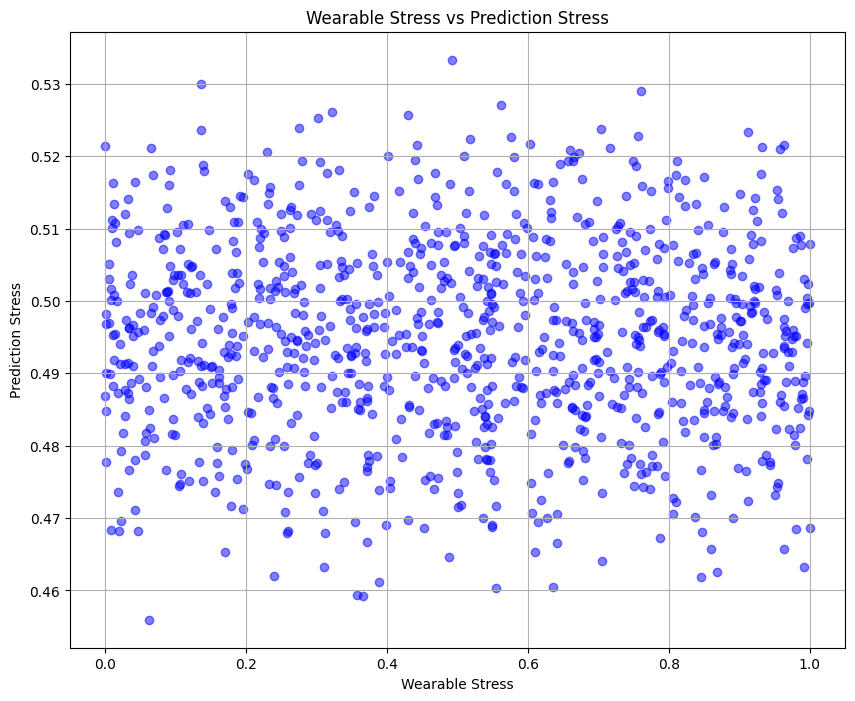

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

mhDataset = pd.read_csv('./dataset/MentalHealthAnalysis.csv')
#print(mhDataset.head())

X1 = mhDataset.iloc[:, 1:8].values
X2 = mhDataset.iloc[:, 9:11].values
#print("X1 :")
#print(X1)
#print("X2 :")
#print(X2)

X = np.concatenate((X1, X2), axis=1)
# np.concatenate((X1, X2), axis=1) : X1과 X2를 합친다. axis=1은 열 방향으로 합친다.
# axis=0은 행 방향으로 합친다.
#print("X :")
#print(X[0])

for x in X:
    if x[1] == 'F':
        x[1] = 0
    elif x[1] == 'M':
        x[1] = 1
    
    if x[7] == 'High':
        x[7] = 3
    elif x[7] == 'Moderate':
        x[7] = 2
    elif x[7] == 'Low':
        x[7] = 1
    
    if x[8] == 'Excellent':
        x[8] = 4
    elif x[8] == 'Good':
        x[8] = 3
    elif x[8] == 'Average':
        x[8] = 2
    elif x[8] == 'Poor':
        x[8] = 1

#print("X :")
#print(X[0])

y = mhDataset.iloc[:, 8].values
#print("y :")
#print(y)

#print(X.shape)
#print(y.shape)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 학습용과 테스트용으로 나누기

reg = LinearRegression()
reg.fit(X_train, y_train)

# 값 예측
y_pred = reg.predict(X_test)
#print(y_pred)

# 정확도 측정
r2 = reg.score(X_test, y_test)
print(f"테스트 데이터에 대한 R-squared 값: {r2:.4f}")
r_squared = reg.score(X, y)
print(f"전체 데이터에 대한 R-squared 값: {r_squared:.4f}")

# 그래프로 표현
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
# 산점도 그리기
# X축: y_test (실제 테스트값), Y축: y_pred (예측값)
# alpha: 투명도
#plt.plot([5, 25], [5, 25], 'r--')
# y=x 선 그리기
plt.xlabel('Wearable Stress')
plt.ylabel('Prediction Stress')
plt.title('Wearable Stress vs Prediction Stress')
plt.grid(True)
plt.show()


### 표 분석

#### 연령과 스트레스

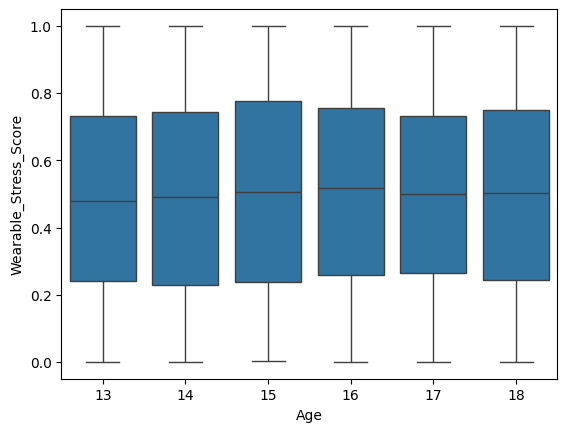

In [34]:

# 데이터 분석
sns.boxplot(x='Age', y='Wearable_Stress_Score', data=mhDataset)
plt.show()

# 연령별로 고루 스트레스가 분포해있다
# 연령이 스트에스에 딱히 영향이 있지 않은 듯
# 15세의 스트레스 박스가 가장 큼
# 17세의 스트레스 박스가 가장 작음

#### 성별과 스트레스

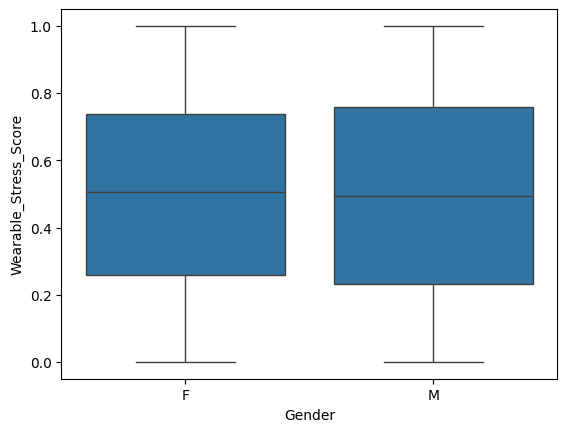

In [37]:
sns.boxplot(x='Gender', y='Wearable_Stress_Score', data=mhDataset)
plt.show()
# 성별로 스트레스가 고루 분포해있다
# 남성이 스트레스 폭이 더 넓음
# 상관관계가 있지 않은 듯

#### 소셜미디어와 스트레스

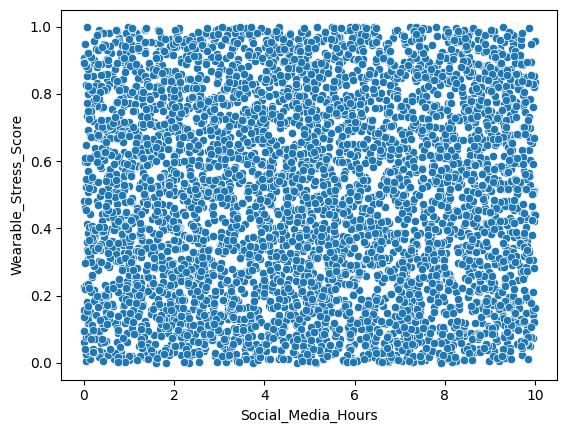

In [ ]:
sns.scatterplot(x='Social_Media_Hours', y='Wearable_Stress_Score', data=mhDataset)
plt.show()
# 이것도 상관관계가 없는 듯

#### 수면시간과 스트레스

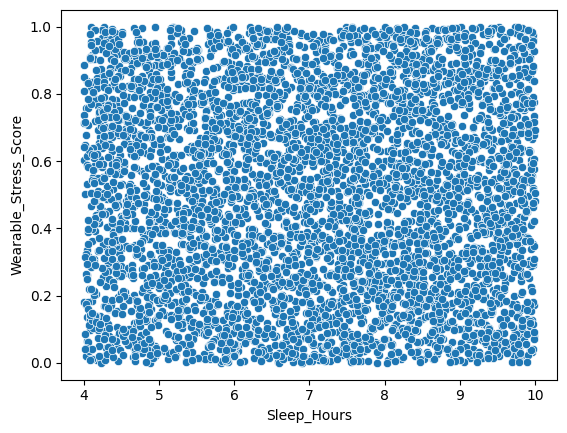

In [ ]:
sns.scatterplot(x='Sleep_Hours', y='Wearable_Stress_Score', data=mhDataset)
plt.show()
# 이것도 상관관계가 없는 듯

#### 전자기기 사용 시간과 스트레스

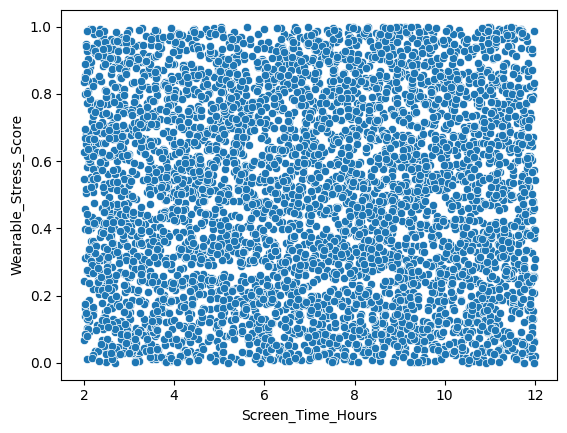

In [ ]:
sns.scatterplot(x='Screen_Time_Hours', y='Wearable_Stress_Score', data=mhDataset)
plt.show()
# 이것도 상관관계가 없는 듯

#### 설문 스트레스 값과 기기측적 스트레스 값

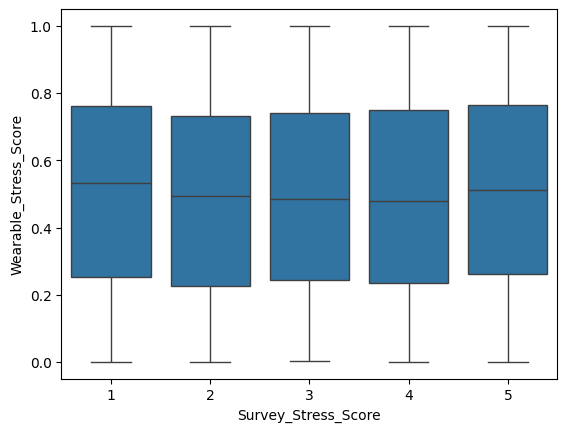

In [44]:
sns.boxplot(x='Survey_Stress_Score', y='Wearable_Stress_Score', data=mhDataset)
plt.show()
# 이것도 상관관계가 없는 듯

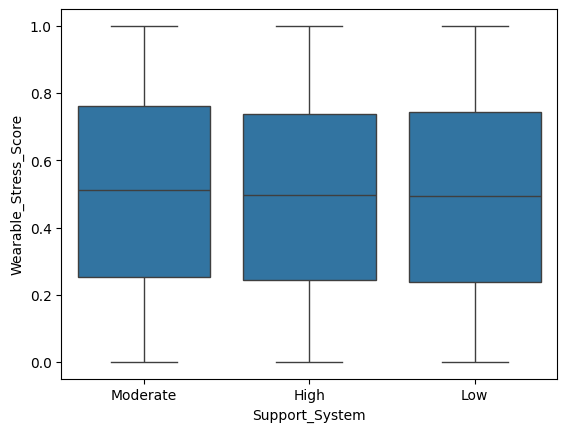

In [45]:
sns.boxplot(x='Support_System', y='Wearable_Stress_Score', data=mhDataset)
plt.show()

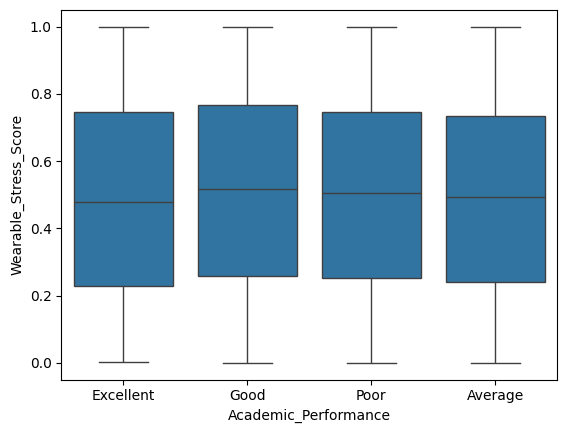

In [46]:
sns.boxplot(x='Academic_Performance', y='Wearable_Stress_Score', data=mhDataset)
plt.show()

### 좋지 않은 데이터인듯

## 거래사기 지표

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import seaborn as sns
import matplotlib.pyplot as plt

fdDataset = pd.read_csv('./dataset/FraudDetectionDataset.csv')
#print(fdDataset.head())


  Transaction_ID  User_ID  Transaction_Amount Transaction_Type  \
0             T1     4174             1292.76   ATM Withdrawal   
1             T2     4507             1554.58   ATM Withdrawal   
2             T3     1860             2395.02   ATM Withdrawal   
3             T4     2294              100.10     Bill Payment   
4             T5     2130             1490.50      POS Payment   

   Time_of_Transaction Device_Used       Location  \
0                 16.0      Tablet  San Francisco   
1                 13.0      Mobile       New York   
2                  NaN      Mobile            NaN   
3                 15.0     Desktop        Chicago   
4                 19.0      Mobile  San Francisco   

   Previous_Fraudulent_Transactions  Account_Age  \
0                                 0          119   
1                                 4           79   
2                                 3          115   
3                                 4            3   
4                       

### 이번엔 데이터분석 먼저

#### 거래금액과 사기

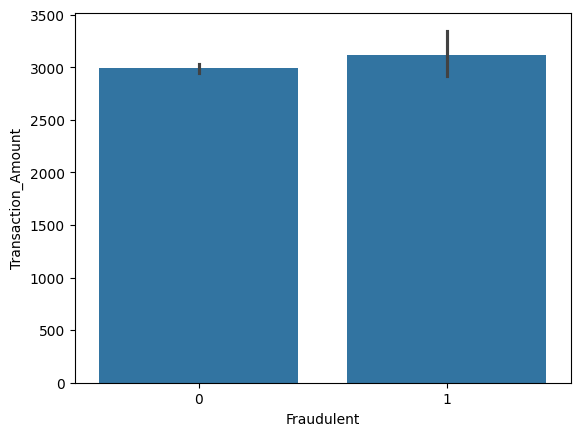

In [ ]:
sns.barplot(x='Fraudulent', y='Transaction_Amount', data=fdDataset)
plt.show()
# 거래금액이 크면 사기일 확률이 높다

#### 지불방식별 사기

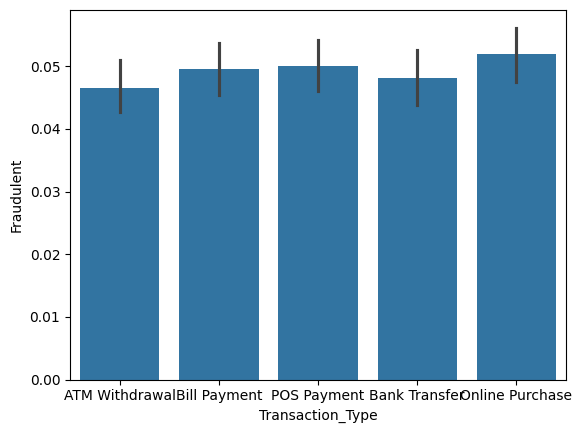

In [ ]:
sns.barplot(x='Transaction_Type', y='Fraudulent', data=fdDataset)
plt.show()
# 온라인에 경우 사기일 확률이 높다

#### 거래 시각과 사기횟수

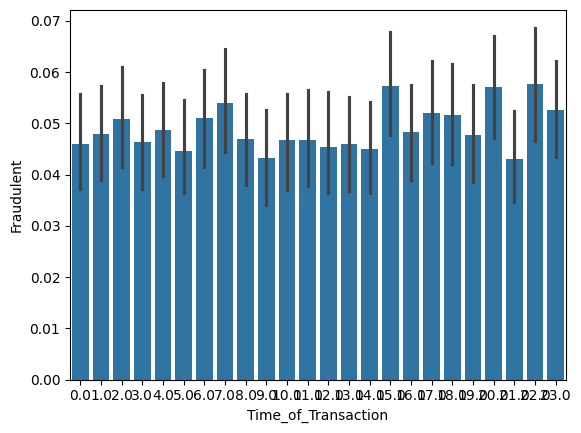

In [ ]:
sns.barplot(x='Time_of_Transaction', y='Fraudulent', data=fdDataset)
plt.show()
# 늦은 시간이 사기인 확률이 높다

#### 거래 기기와 사기횟수

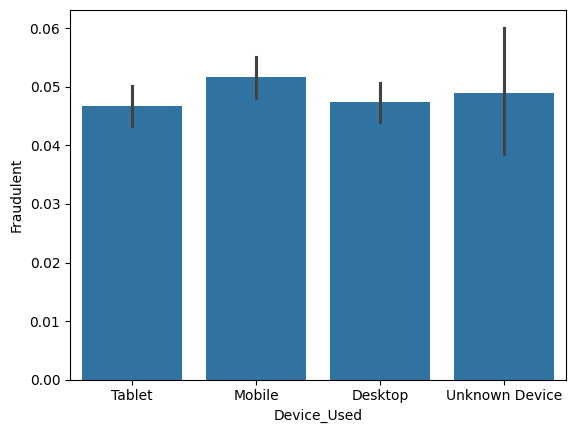

In [ ]:
sns.barplot(x='Device_Used', y='Fraudulent', data=fdDataset)
plt.show()
# 모바일 사기가 많음

#### 거래 위치와 사기

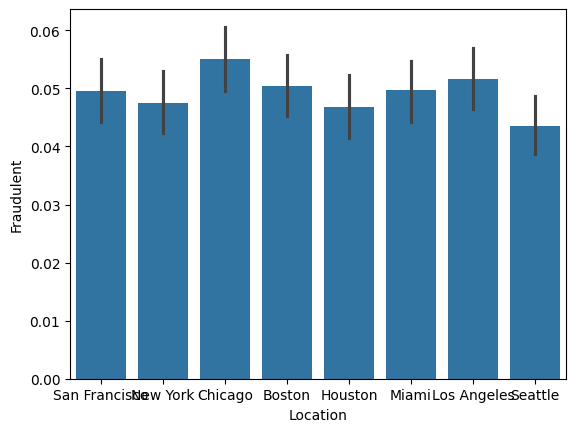

In [ ]:
sns.barplot(x='Location', y='Fraudulent', data=fdDataset)
plt.show()
# 시카고 사기가 많음

#### 이전 사기거래 경험과 사기 관계

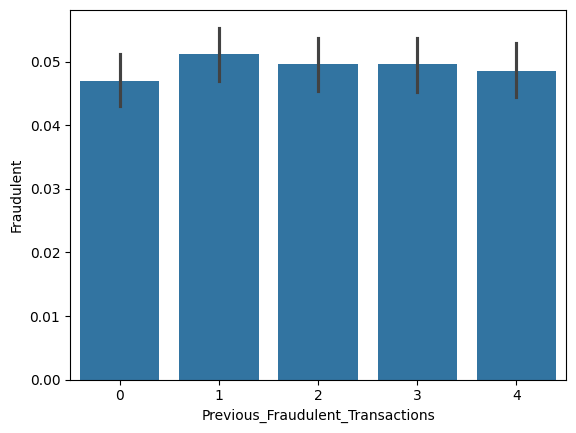

In [ ]:
sns.barplot(x='Previous_Fraudulent_Transactions', y='Fraudulent', data=fdDataset)
plt.show()
# 사기를 경험한 편이 경험하지 않은 경우보다 사기꾼일 확률이 높음

#### 나이와 사기 관계

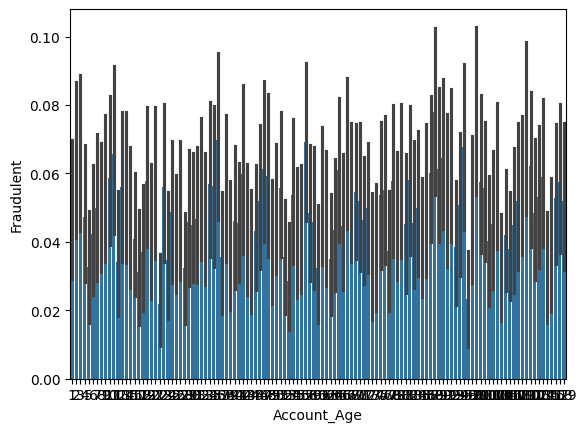

In [ ]:
sns.barplot(x='Account_Age', y='Fraudulent', data=fdDataset)
plt.show()
# 나이로는 파악하기 힘들다

#### 이전 거래시간과 사기 관계

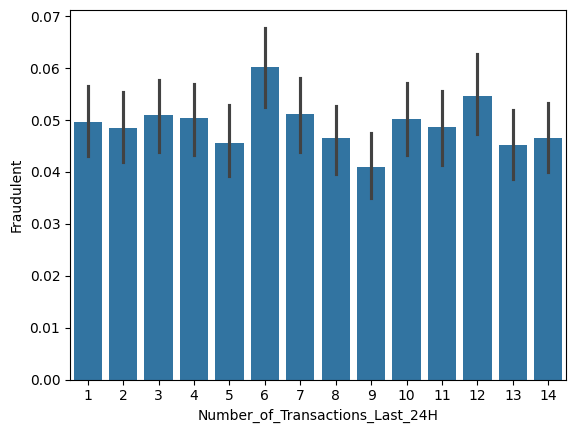

In [ ]:
sns.barplot(x='Number_of_Transactions_Last_24H', y='Fraudulent', data=fdDataset)
plt.show()
# 거래에 적당한 시간을 두면 사기꾼일 수 있음(6시간)

#### 지불 매개체와 사기관계

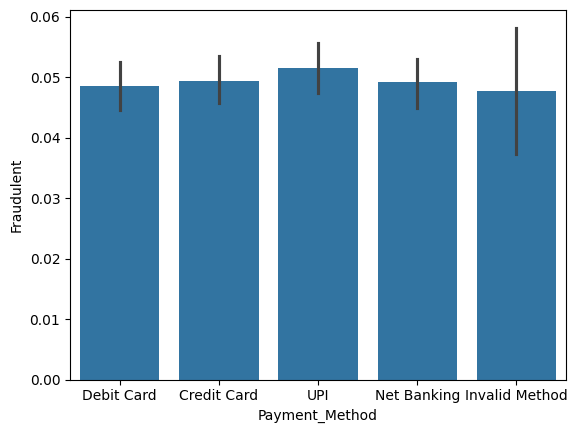

In [ ]:
sns.barplot(x='Payment_Method', y='Fraudulent', data=fdDataset)
plt.show()
# 모호함

### 학습

In [82]:
#print(fdDataset.head())
# 나이와 지불 매개체 컬럼을 제외하자

X1 = fdDataset.iloc[:, 2:8].values
X2 = fdDataset.iloc[:, 9:10].values
#print("X1 :")
#print(X1)
#print("X2 :")
#print(X2)
X = np.concatenate((X1, X2), axis=1)
#print("X :")
#print(X[0])
y = fdDataset.iloc[:, -1].values
#print("y :")
#print(y)

pay_type = list(set(X[:,1]))
device = list(set(X[:,3]))
loc = list(set(X[:,4]))
print(pay_type)
print(device)
print(loc)
# set() : 집합타입으로 변환 : 중복 제거
# list() : 이를 다시 리스트로 변환

for x in X:
    if x[1] == pay_type[0]:
        x[1] = 1
    elif x[1] == pay_type[1]:
        x[1] = 2
    elif x[1] == pay_type[2]:
        x[1] = 3
    elif x[1] == pay_type[3]:
        x[1] = 4
    elif x[1] == pay_type[4]:
        x[1] = 5
    
    if x[3] == device[0]:
        x[3] = 1
    elif x[3] == device[2]:
        x[3] = 2
    elif x[3] == device[3]:
        x[3] = 3
    elif x[3] == device[4]:
        x[3] = 4
    else:
        x[3] = 0
    
    if x[4] == loc[0]:
        x[4] = 1
    elif x[4] == loc[1]:
        x[4] = 2
    elif x[4] == loc[2]:
        x[4] = 3
    elif x[4] == loc[3]:
        x[4] = 4
    elif x[4] == loc[4]:
        x[4] = 5
    elif x[4] == loc[6]:
        x[4] = 6
    elif x[4] == loc[7]:
        x[4] = 7
    elif x[4] == loc[8]:
        x[4] = 8
    else:
        x[4] = 0
        
print("X :")
print(X)

['Bill Payment', 'Online Purchase', 'Bank Transfer', 'POS Payment', 'ATM Withdrawal']
['Unknown Device', nan, 'Tablet', 'Mobile', 'Desktop']
['Chicago', 'New York', 'San Francisco', 'Seattle', 'Houston', nan, 'Miami', 'Boston', 'Los Angeles']
X :
[[1292.76 5 16.0 ... 3 0 13]
 [1554.58 5 13.0 ... 2 4 3]
 [2395.02 5 nan ... 0 3 9]
 ...
 [2204.43 4 18.0 ... 3 3 5]
 [4787.17 4 19.0 ... 2 2 14]
 [814.72 4 3.0 ... 8 0 10]]
